# OCR com Python e Tesseract

# Reconhecimento de texto em imagens

## Instalando o Tesseract

Documentação: https://pypi.org/project/pytesseract/

In [1]:
# !pip install Pillow==9.1.0 # necessário após atualização no módulo Pillow carregado pelo Colab
# Após executar, clique no botão [Restart Runtime] que vai aparecer no output dessa célula, logo abaixo. Em seguida, pode continuar executando normalmente o restante do código

## Importando as bibliotecas

In [2]:
import pytesseract
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
from PIL import Image
# from google.colab.patches import cv2_imshow

## Leitura da imagem

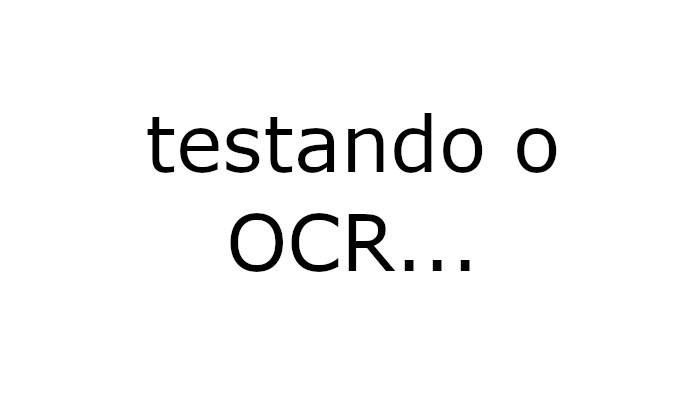

In [3]:
img = cv2.imread('../data/Imagens/teste01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(rgb)

In [6]:
texto = pytesseract.image_to_string(rgb)

In [7]:
print(texto)

testando o
OCR...



## Suporte para caracteres e símbolos de outros idiomas

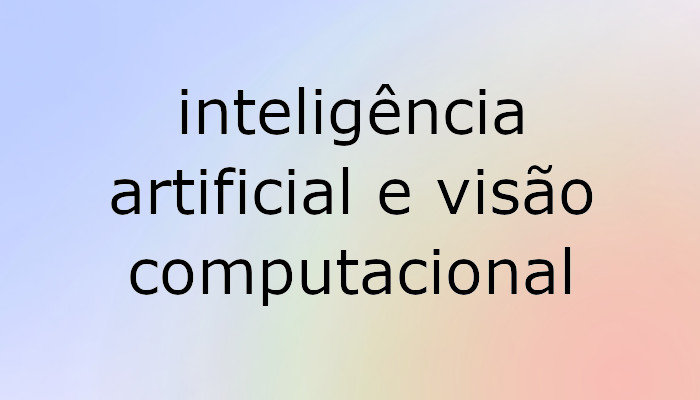

In [9]:
img = cv2.imread('../data/Imagens/teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(rgb)

In [10]:
texto = pytesseract.image_to_string(rgb)
print(texto) # resumé, fiancé, déjà vu

inteligéncia
artificial e visao
computacional



In [11]:
!tesseract --list-langs

List of available languages in "/usr/share/tesseract/tessdata/" (1):
eng


In [13]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [16]:
config_tesseract = '--tessdata-dir ../data/tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



## Parâmetros

### Page segmentation modes (PSM)

In [18]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


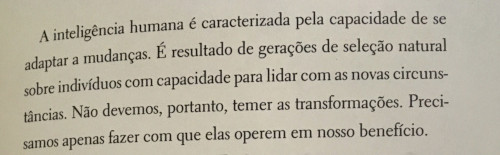

In [20]:
img = cv2.imread('../data/Imagens/trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(rgb)

In [22]:
config_tesseract = '--tessdata-dir ../data/tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
“obre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [24]:
config_tesseract = '--tessdata-dir ../data/tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
“obre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



In [25]:
config_tesseract = '--tessdata-dir ../data/tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªâªªââ%%ã%ãâêâã%%?ª%%ã



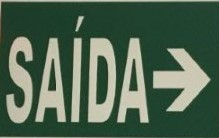

In [27]:
img = cv2.imread('../data/Imagens/saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(rgb)

In [28]:
config_tesseract = '--tessdata-dir ../data/tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



### Detecção de orientação da página

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

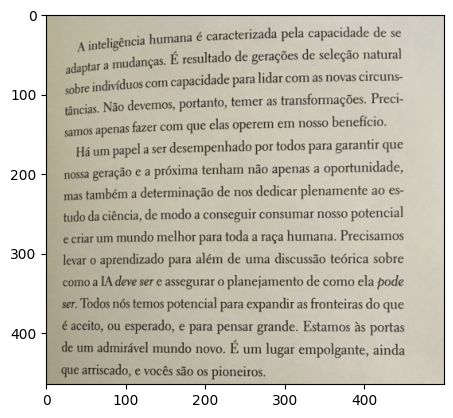

In [30]:
img = Image.open('../data/Imagens/livro01.jpg')
plt.imshow(img);

In [32]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



# Seleção dos textos



In [33]:
from pytesseract import Output

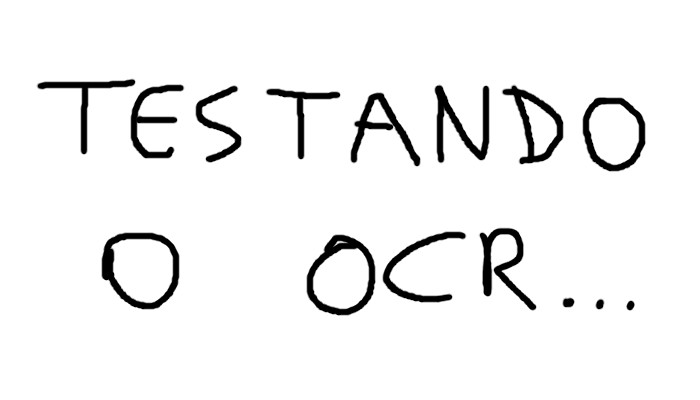

In [34]:
img = cv2.imread('../data/Imagens/teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(rgb)

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [35]:
resultado = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'conf': [-1, -1, -1, -1, 95, -1, 55, 43],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}

In [36]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [37]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [38]:
len(resultado['text'])

8

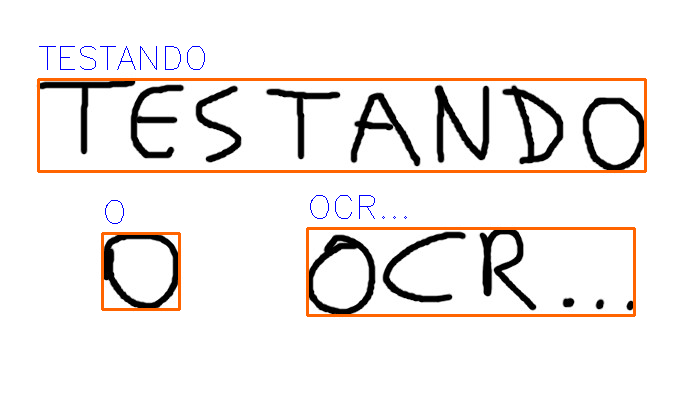

In [39]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  #print(i)
  confianca = int(resultado['conf'][i])
  #print(confianca)
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    #print(x, y)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))

Image.fromarray(img_copia)

In [41]:
img = cv2.imread('../data/Imagens/teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [42]:
resultado = pytesseract.image_to_data(rgb, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 96, -1, 96, 96, 96, -1, 96],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [43]:
from PIL import ImageFont, ImageDraw, Image
fonte = '../data/Fontes/calibri.ttf'

In [44]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

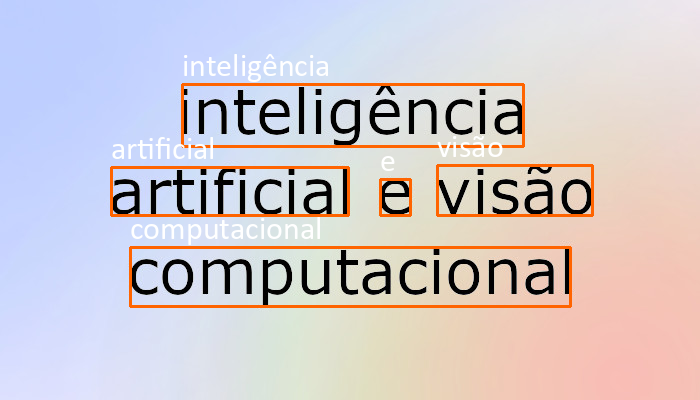

In [45]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)

Image.fromarray(img_copia)

# Buscando informações específicas na imagem

In [46]:
import re # regular expressions

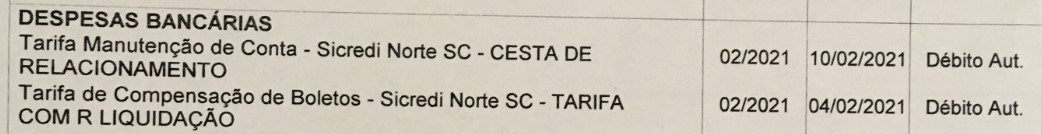

In [47]:
img = cv2.imread("../data/Imagens/tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image.fromarray(rgb)

In [48]:
resultado = pytesseract.image_to_data(rgb, lang="por", output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [49]:
# https://regexr.com/
padrao_data = "^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$"

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_32407/1652494561.py:2: SyntaxWarning: invalid escape sequence '\d'
  padrao_data = "^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$"


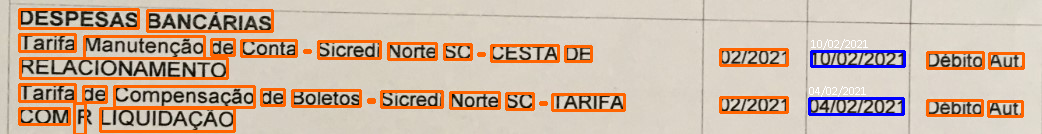

In [50]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

Image.fromarray(img_copia)

In [51]:
datas

['10/02/2021', '04/02/2021']

# Detecção de texto em cenários naturais

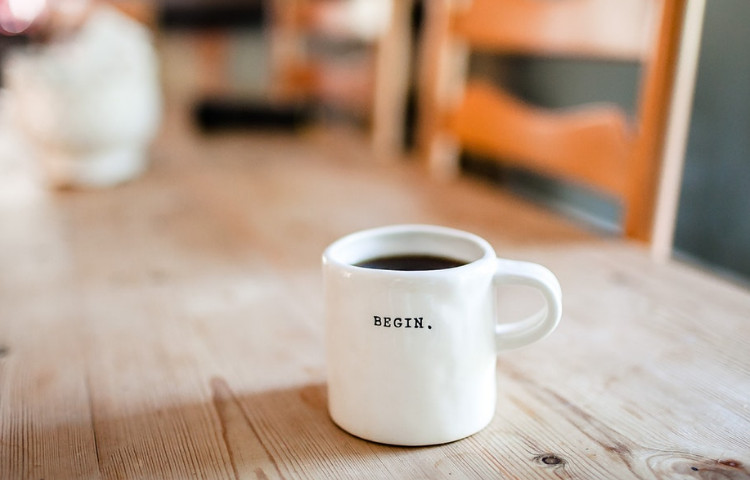

In [52]:
img = cv2.imread("../data/Imagens/caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image.fromarray(rgb)

In [54]:
config_tesseract = "--psm 11"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="eng", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 'left': [0, 0, 0, 0, 0, 374, 374, 374, 374, 287, 287, 287, 287],
 'top': [0, 0, 0, 0, 0, 316, 316, 316, 316, 404, 404, 404, 404],
 'width': [750, 642, 642, 642, 642, 58, 58, 58, 58, 178, 178, 178, 178],
 'height': [480, 161, 161, 161, 161, 13, 13, 13, 13, 61, 61, 61, 61],
 'conf': [-1, -1, -1, -1, 9, -1, -1, -1, 69, -1, -1, -1, 10],
 'text': ['', '', '', '', '=', '', '', '', 'BEGIN.', '', '', '', 'i']}

In [55]:
min_conf = 50

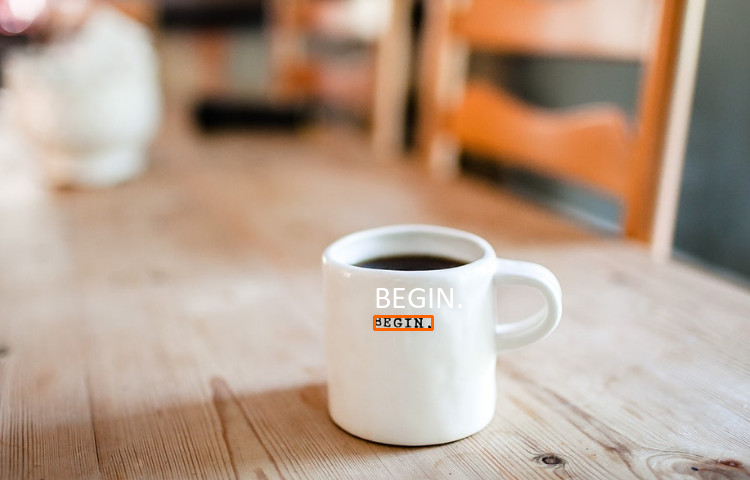

In [56]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)

Image.fromarray(img_copia)

In [57]:
resultado['conf']

[-1, -1, -1, -1, 9, -1, -1, -1, 69, -1, -1, -1, 10]

In [58]:
resultado['text']

['', '', '', '', '=', '', '', '', 'BEGIN.', '', '', '', 'i']